# 第2章 語

In [1]:
# これまでに定義した関数の読み込み #

from chapter01 import get_string_from_file

## 2.2 形態素解析

In [2]:
# Listing 2.1 #

import re

string = get_string_from_file('data/ch02/alice.txt')
tokens = re.split('[ \n\.]+', string)
for t in tokens[:10]:
    print(t)

ALICE’S
ADVENTURES
IN
WONDERLAND
Lewis
Carroll
THE
MILLENNIUM
FULCRUM
EDITION


In [3]:
# Listing 2.2 #

from janome.tokenizer import Tokenizer

tokenizer = Tokenizer()
string = 'すもももももももものうち'
for t in tokenizer.tokenize(string):
    print('{}\t{}'.format(t.surface, t.part_of_speech))

すもも	名詞,一般,*,*
も	助詞,係助詞,*,*
もも	名詞,一般,*,*
も	助詞,係助詞,*,*
もも	名詞,一般,*,*
の	助詞,連体化,*,*
うち	名詞,非自立,副詞可能,*


In [4]:
# Listing 2.3 #

string = 'すもももももももものうち'
tokenizer = Tokenizer(wakati=True)
print(list(tokenizer.tokenize(string))) # あるいは tokenize(string, wakati=True)

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']


In [5]:
# Listing 2.4 #

string = 'ふなっしーはかわいい'
tokenizer = Tokenizer()
for t in tokenizer.tokenize(string):
    print('{}\t{}'.format(t.surface, t.part_of_speech))

ふ	動詞,自立,*,*
なっ	動詞,非自立,*,*
し	助動詞,*,*,*
ー	名詞,一般,*,*
は	助詞,係助詞,*,*
かわいい	形容詞,自立,*,*


In [6]:
# Listing 2.5 #

string = 'ふなっしーはかわいい'
tokenizer = Tokenizer('data/ch02/userdic.csv', udic_type='simpledic')
for t in tokenizer.tokenize(string):
    print('{}\t{}'.format(t.surface, t.part_of_speech))

ふなっしー	名詞,*,*,*
は	助詞,係助詞,*,*
かわいい	形容詞,自立,*,*


In [7]:
# Listing 2.6 #

from janome.tokenizer import Tokenizer

def get_m_snippet_from_file(filename, query, width=3):
    t = Tokenizer(wakati=True)
    qlist = list(t.tokenize(query))
    qlen = len(qlist)
    s = get_string_from_file(filename)
    slist = list(t.tokenize(s))
    for i in [k for k, v in enumerate(slist) if v == qlist[0]]:
        if qlist == slist[i:i + qlen]:
            return ''.join(slist[max(0,i - width):i + width + qlen])
    return None

In [8]:
# Listing 2.7 (京都) #

query = '京都'
file_list = ['data/ch01/%02d.txt' % x for x in (1, 2, 3, 4)]               
for f in file_list:
    print(f, get_m_snippet_from_file(f, query))

data/ch01/01.txt 祇園祭は京都三大祭の
data/ch01/02.txt None
data/ch01/03.txt 京都のお土産
data/ch01/04.txt None


In [9]:
# Listing 2.7 (東京) #

query = '東京'
file_list = ['data/ch01/%02d.txt' % x for x in (1, 2, 3, 4)]               
for f in file_list:
    print(f, get_m_snippet_from_file(f, query))

data/ch01/01.txt None
data/ch01/02.txt None
data/ch01/03.txt None
data/ch01/04.txt 築地市場は東京都江東区


## 2.3 Bag-of-words

In [10]:
# Listing 2.8 #

%matplotlib inline                                                         
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(frequencies, font, width=600, height=400):
    wordcloud = WordCloud(background_color='white', font_path=font,
                          width=width, height=height)
    plt.figure(figsize=(width/50, height/50))
    plt.imshow(wordcloud.generate_from_frequencies(frequencies))
    plt.axis('off')
    plt.show()

In [11]:
# Listing 2.9 #

from janome.analyzer import Analyzer
from janome.tokenfilter import ExtractAttributeFilter
from janome.tokenfilter import POSStopFilter

def get_words(s):
    a = Analyzer(token_filters=[POSStopFilter(['記号']), 
                                ExtractAttributeFilter('surface')])
    return list(a.analyze(s))

def get_words_from_file(f):
    return get_words(get_string_from_file(f))

In [12]:
# Listing 2.10 #

import matplotlib.font_manager as fm
from matplotlib import rcParams
    
japanese_font_candidates = ['Hiragino Maru Gothic Pro', 'Yu Gothic',
                                            'Arial Unicode MS', 'Meirio', 'Takao',
                                            'IPAexGothic', 'IPAPGothic', 'VL PGothic',
                                            'Noto Sans CJK JP']

def get_japanese_fonts(candidates=japanese_font_candidates):
    fonts = []
    for f in fm.findSystemFonts():
        p = fm.FontProperties(fname=f)
        try:
            n = p.get_name()
            if n in candidates:
                fonts.append(f)
        except RuntimeError:
            pass
    # サンプルデータアーカイブに含まれているIPAexフォントを追加
    fonts.append('font/ipaexg.ttf')
    return fonts

def configure_fonts_for_japanese(fonts=japanese_font_candidates):
    if hasattr(fm.fontManager, 'addfont'):
        fm.fontManager.addfont('font/ipaexg.ttf')
    else:
        ipa_font_files = fm.findSystemFonts(fontpaths='font')
        ipa_font_list = fm.createFontList(ipa_font_files)
        fm.fontManager.ttflist.extend(ipa_font_list)
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = fonts

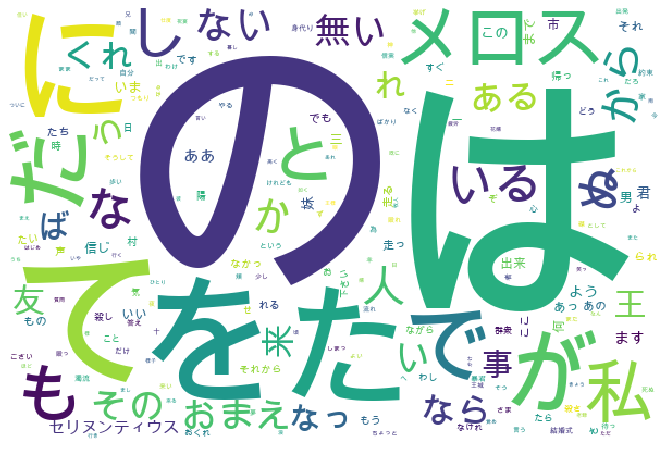

In [13]:
# Listing 2.11 #

from collections import Counter

string = get_string_from_file('data/ch01/melos.txt')
words = get_words(string)
count = Counter(words)
font = get_japanese_fonts()[0]
create_wordcloud(count, font)

In [14]:
# Listing 2.12 #

import matplotlib.pyplot as plt

def plot_frequency(count, log_scale=False):
    y = list(sorted(count.values(), reverse=True))
    x = range(1, len(y) + 1)
    if log_scale:
        plt.loglog(x, y)
    else:
        plt.plot(x, y)

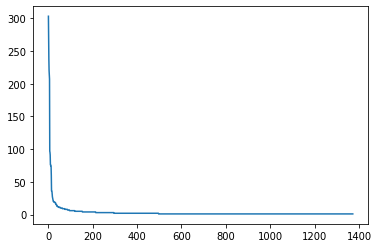

In [15]:
# Listing 2.13 #

plot_frequency(Counter(get_words(get_string_from_file('data/ch01/melos.txt'))))